<a href="https://colab.research.google.com/github/NakacwaOlivia/Enviro-Predict/blob/main/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Air Quality Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Enviro-Predict HealthGuard+/final/AirQuality_dataset.csv')

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,latitude,longitude
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,23.021624,72.579707
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,23.021624,72.579707
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,23.021624,72.579707
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,23.021624,72.579707
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,23.021624,72.579707


In [ ]:
data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
# from geopy.geocoders import Nominatim
# import pandas as pd

# data = pd.read_csv('/content/drive/MyDrive/Enviro-Predict HealthGuard+/final/AirQuality.csv')

# address=['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
#          'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
#          'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']

# # Create a geolocator object
# geolocator = Nominatim(user_agent="Your_Name")

# # Add new columns to the dataset to store the latitude and longitude coordinates
# data['latitude'] = None
# data['longitude'] = None

# # Iterate over the list of addresses and geocode each one, adding the latitude and longitude coordinates to the new columns
# for city_name in address:
#     location = geolocator.geocode(city_name)

#     if location:
#         data.loc[data['City'] == city_name, 'latitude'] = location.latitude
#         data.loc[data['City'] == city_name, 'longitude'] = location.longitude

# # Save the updated dataset
# # data.to_csv('AirQuality_dataset.csv', index=False)


#### Data Cleaning

In [ ]:
# Checking for null values
data.isnull().count()

City          29531
Date          29531
PM2.5         29531
PM10          29531
NO            29531
NO2           29531
NOx           29531
NH3           29531
CO            29531
SO2           29531
O3            29531
Benzene       29531
Toluene       29531
Xylene        29531
AQI           29531
AQI_Bucket    29531
latitude      29531
longitude     29531
dtype: int64

In [ ]:
# Select the columns you want to display
select_columns = ['City', 'longitude', 'latitude', 'PM2.5', 'AQI_Bucket']

# Use the DataFrame indexing to extract the selected columns
df = data[select_columns]
df

,City,longitude,latitude,PM2.5,AQI_Bucket
0,Ahmedabad,72.579707,23.021624,NaN,NaN
1,Ahmedabad,72.579707,23.021624,NaN,NaN
2,Ahmedabad,72.579707,23.021624,NaN,NaN
3,Ahmedabad,72.579707,23.021624,NaN,NaN
4,Ahmedabad,72.579707,23.021624,NaN,NaN
...,...,...,...,...,...
29526,Visakhapatnam,83.301284,17.723128,15.02,Good
29527,Visakhapatnam,83.301284,17.723128,24.38,Satisfactory
29528,Visakhapatnam,83.301284,17.723128,22.91,Satisfactory
29529,Visakhapatnam,83.301284,17.723128,16.64,Satisfactory


In [ ]:
# Displaying only columns with missing values
df.columns[df.isnull().any()]

Index(['PM2.5', 'AQI_Bucket'], dtype='object')

In [ ]:
# Dropping missing values
df.dropna(subset=['PM2.5', 'AQI_Bucket'], inplace=True)
df

<ipython-input-10-3008eb0cb143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['PM2.5', 'AQI_Bucket'], inplace=True)


,City,longitude,latitude,PM2.5,AQI_Bucket
28,Ahmedabad,72.579707,23.021624,83.13,Poor
29,Ahmedabad,72.579707,23.021624,79.84,Very Poor
30,Ahmedabad,72.579707,23.021624,94.52,Severe
31,Ahmedabad,72.579707,23.021624,135.99,Severe
32,Ahmedabad,72.579707,23.021624,178.33,Severe
...,...,...,...,...,...
29526,Visakhapatnam,83.301284,17.723128,15.02,Good
29527,Visakhapatnam,83.301284,17.723128,24.38,Satisfactory
29528,Visakhapatnam,83.301284,17.723128,22.91,Satisfactory
29529,Visakhapatnam,83.301284,17.723128,16.64,Satisfactory


In [ ]:
import pandas as pd
import numpy as np

# Define a function to get a random value from a group
def get_random_value(group):
    return group.sample(random_state=30).iloc[0]

def generate_random_pm2_5(dataframe):
    random_pm2_5 = df.groupby(['City', 'longitude', 'latitude', 'AQI_Bucket'])['PM2.5'].apply(get_random_value)
    df_final = random_pm2_5.reset_index()
    return df_final

df_final = generate_random_pm2_5(df)

# Print the result
df_final

,City,longitude,latitude,AQI_Bucket,PM2.5
0,Ahmedabad,72.579707,23.021624,Good,29.22
1,Ahmedabad,72.579707,23.021624,Moderate,39.44
2,Ahmedabad,72.579707,23.021624,Poor,103.29
3,Ahmedabad,72.579707,23.021624,Satisfactory,30.29
4,Ahmedabad,72.579707,23.021624,Severe,114.60
...,...,...,...,...,...
123,Visakhapatnam,83.301284,17.723128,Good,11.07
124,Visakhapatnam,83.301284,17.723128,Moderate,66.07
125,Visakhapatnam,83.301284,17.723128,Poor,106.06
126,Visakhapatnam,83.301284,17.723128,Satisfactory,33.69


In [ ]:
# Giving the correlating comment to the PM2.5 values
def get_comment(df_final):
    if df_final['PM2.5'] <= 12:
        return 'Good'
    elif df_final['PM2.5'] > 12 and df_final['PM2.5'] <= 35:
        return 'Moderate'
    elif df_final['PM2.5'] > 35 and df_final['PM2.5'] <= 55:
        return 'Unhealthy For Sensitive Groups'
    elif df_final['PM2.5'] > 55 and df_final['PM2.5'] <= 150:
        return 'Unhealthy'
    elif df_final['PM2.5'] > 150 and df_final['PM2.5'] <= 250:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df_final['Comment'] = df_final.apply(get_comment, axis=1)

dx = df_final.drop(['City', 'AQI_Bucket'], axis=1)
dx

,longitude,latitude,PM2.5,Comment
0,72.579707,23.021624,29.22,Moderate
1,72.579707,23.021624,39.44,Unhealthy For Sensitive Groups
2,72.579707,23.021624,103.29,Unhealthy
3,72.579707,23.021624,30.29,Moderate
4,72.579707,23.021624,114.60,Unhealthy
...,...,...,...,...
123,83.301284,17.723128,11.07,Good
124,83.301284,17.723128,66.07,Unhealthy
125,83.301284,17.723128,106.06,Unhealthy
126,83.301284,17.723128,33.69,Moderate


<Axes: xlabel='count', ylabel='Comment'>

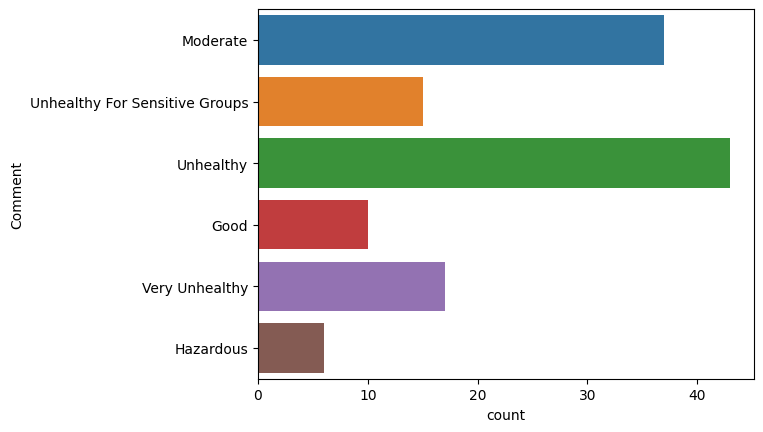

In [ ]:
# Number and count of the comments
import seaborn as sns
sns.countplot(y = 'Comment', data=dx)

### User Healthy Data

In [ ]:
import pandas as pd

dataframe = pd.read_csv('/content/drive/MyDrive/Enviro-Predict HealthGuard+/final/health_data.csv')
dataframe

,Name,Date of Birth,Longitude,Latitude,Health_Conditions,Health_Status,Activities
0,Jessica Williams,1948-09-02,96.767846,31.517086,None,Healthy,Running
1,Louis Adams,1951-12-11,86.622090,32.749367,None,Healthy,Swimming
2,Michael Romero,1951-06-19,79.819902,19.931997,Heart Valve Disease,Sick,Walking
3,Tiffany Warner,1958-01-22,70.183826,34.200609,None,Healthy,Swimming
4,Juan Bailey DDS,1986-03-10,82.744030,33.222555,None,Healthy,Cycling
...,...,...,...,...,...,...,...
2495,Mr. Jesse Carroll DDS,1967-10-29,87.995304,31.240423,None,Healthy,Cycling
2496,Cynthia Smith,1956-01-02,78.048865,13.618442,None,Healthy,Walking
2497,Anthony Jones MD,1976-07-22,71.211152,35.992289,Cardiomyopathy,Sick,Cycling
2498,Michelle Roberts,2002-06-22,80.733310,35.276163,Congenital Heart Disease,Sick,Walking


In [ ]:
dataframe['Health_Conditions'].unique()

array(['None', 'Heart Valve Disease', 'Asthma', 'Heart failure',
       'Pericardial Disease', 'Coronary Artery Disease',
       'Congenital Heart Disease', 'Cardiomyopathy', 'Heart Arrhythmias'],
      dtype=object)

<Axes: xlabel='count', ylabel='Health_Conditions'>

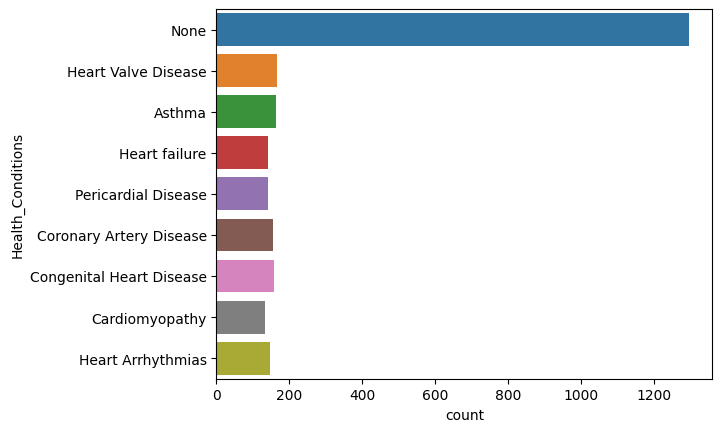

In [ ]:
# Number and count of the comments
import seaborn as sns
sns.countplot(y = 'Health_Conditions', data=dataframe)

In [ ]:
# Calculating and adding the age column
from datetime import datetime
# Convert 'Date_of_Birth' column to datetime
dataframe['Date of Birth'] = pd.to_datetime(dataframe['Date of Birth'])

# Calculate age
current_year = datetime.now().year
dataframe['Age'] = current_year - dataframe['Date of Birth'].dt.year

# Print the DataFrame
dataframe

,Name,Date of Birth,Longitude,Latitude,Health_Conditions,Health_Status,Activities,Age
0,Jessica Williams,1948-09-02,96.767846,31.517086,None,Healthy,Running,75
1,Louis Adams,1951-12-11,86.622090,32.749367,None,Healthy,Swimming,72
2,Michael Romero,1951-06-19,79.819902,19.931997,Heart Valve Disease,Sick,Walking,72
3,Tiffany Warner,1958-01-22,70.183826,34.200609,None,Healthy,Swimming,65
4,Juan Bailey DDS,1986-03-10,82.744030,33.222555,None,Healthy,Cycling,37
...,...,...,...,...,...,...,...,...
2495,Mr. Jesse Carroll DDS,1967-10-29,87.995304,31.240423,None,Healthy,Cycling,56
2496,Cynthia Smith,1956-01-02,78.048865,13.618442,None,Healthy,Walking,67
2497,Anthony Jones MD,1976-07-22,71.211152,35.992289,Cardiomyopathy,Sick,Cycling,47
2498,Michelle Roberts,2002-06-22,80.733310,35.276163,Congenital Heart Disease,Sick,Walking,21


In [ ]:
# Select the columns you want to display
select_columns = ['Age', 'Health_Conditions', 'Health_Status', 'Activities', 'Longitude', 'Latitude']

# Use the DataFrame indexing to extract the selected columns
dt = dataframe[select_columns]
dt

,Age,Health_Conditions,Health_Status,Activities,Longitude,Latitude
0,75,None,Healthy,Running,96.767846,31.517086
1,72,None,Healthy,Swimming,86.622090,32.749367
2,72,Heart Valve Disease,Sick,Walking,79.819902,19.931997
3,65,None,Healthy,Swimming,70.183826,34.200609
4,37,None,Healthy,Cycling,82.744030,33.222555
...,...,...,...,...,...,...
2495,56,None,Healthy,Cycling,87.995304,31.240423
2496,67,None,Healthy,Walking,78.048865,13.618442
2497,47,Cardiomyopathy,Sick,Cycling,71.211152,35.992289
2498,21,Congenital Heart Disease,Sick,Walking,80.733310,35.276163


### Forming one dataset

In [ ]:
# Joining the two dataframes using geopandas
import geopandas as gpd

# Convert the first dataframe to a GeoDataFrame with geometry column
dx1 = gpd.GeoDataFrame(dx, geometry=gpd.points_from_xy(dx.longitude, dx.latitude))

# Convert the second dataframe to a GeoDataFrame with geometry column
dt2 = gpd.GeoDataFrame(dt, geometry=gpd.points_from_xy(dt.Longitude, dt.Latitude))

# Set the CRS of both GeoDataFrames to WGS 84 (EPSG:4326)
dx1 = dx1.set_crs("EPSG:4326")
dt2 = dt2.set_crs("EPSG:4326")

# Perform a right join using sjoin_nearest
joined_df = gpd.sjoin_nearest(dt2, dx1, how="left", distance_col="distances")

# Print the first 5 rows of the result
joined_df.head()

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,Age,Health_Conditions,Health_Status,Activities,Longitude,Latitude,geometry,index_right,longitude,latitude,PM2.5,Comment,distances
0,75,None,Healthy,Running,96.767846,31.517086,POINT (96.76785 31.51709),64,91.753943,26.180598,91.53,Unhealthy,7.322386
0,75,None,Healthy,Running,96.767846,31.517086,POINT (96.76785 31.51709),65,91.753943,26.180598,24.00,Moderate,7.322386
0,75,None,Healthy,Running,96.767846,31.517086,POINT (96.76785 31.51709),66,91.753943,26.180598,378.08,Hazardous,7.322386
0,75,None,Healthy,Running,96.767846,31.517086,POINT (96.76785 31.51709),67,91.753943,26.180598,183.04,Very Unhealthy,7.322386
0,75,None,Healthy,Running,96.767846,31.517086,POINT (96.76785 31.51709),63,91.753943,26.180598,55.61,Unhealthy,7.322386


In [ ]:
# Selecting columns needed for the model
final_df = joined_df.drop(['latitude', 'longitude', 'Latitude', 'Longitude', 'index_right', 'distances'], axis = 1)
final_df

,Age,Health_Conditions,Health_Status,Activities,geometry,PM2.5,Comment
0,75,None,Healthy,Running,POINT (96.76785 31.51709),91.53,Unhealthy
0,75,None,Healthy,Running,POINT (96.76785 31.51709),24.00,Moderate
0,75,None,Healthy,Running,POINT (96.76785 31.51709),378.08,Hazardous
0,75,None,Healthy,Running,POINT (96.76785 31.51709),183.04,Very Unhealthy
0,75,None,Healthy,Running,POINT (96.76785 31.51709),55.61,Unhealthy
...,...,...,...,...,...,...,...
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),39.44,Unhealthy For Sensitive Groups
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),29.22,Moderate
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),86.07,Unhealthy
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),114.60,Unhealthy


<Axes: xlabel='count', ylabel='Comment'>

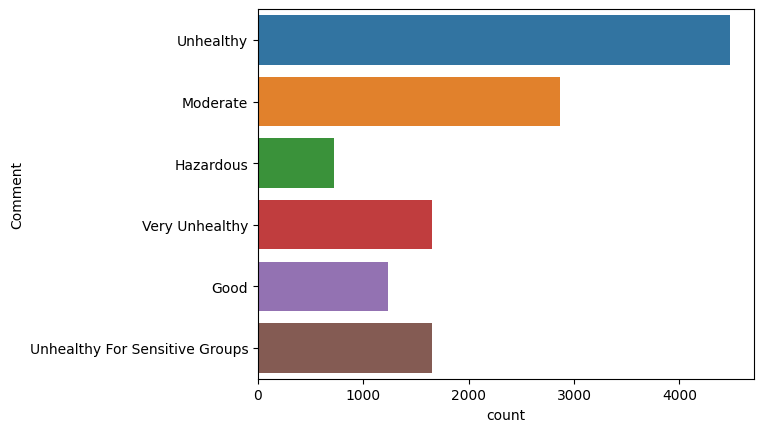

In [ ]:
# Number and count of the comments
import seaborn as sns
sns.countplot(y = 'Comment', data=final_df)

In [ ]:
import random

# rec_df = pd.DataFrame()
def Good():
    return 'Good day to be active outside' # even if sick

def Moderate(Health_Status):
    if Health_Status == 'Healthy':
        return 'Good day to be active outside'

    return random.choice(['Reduce prolonged/heavy outdoor exertion and Take more breaks during outdoor activities'])

def Unhealthy_For_Sensitive_Groups(Age, Health_Conditions):
    if Age > 45:
        return 'Reduce prolonged or heavy outdoor exertion'

    if Health_Conditions in ['Heart Valve Disease', 'Asthma', 'Heart failure', 'Pericardial Disease', 'Coronary Artery Disease',
                             'Congenital Heart Disease', 'Cardiomyopathy', 'Heart Arrhythmias']:
        return 'keep quick relief medicine handy'

    return 'Good day to be active outside'

def unhealthy(Health_Status, Age):
    if Health_Status == 'Healthy' and Age < 45:
        return 'Reduce prolonged or heavy outdoor exertion'

    return random.choice(['Avoid prolonged/heavy outdoor exertion or reschedule for when air quality is better'])

def very_unhealthy(Health_Status, Age):
    if Health_Status == 'Healthy' and Age < 45:
        return random.choice(['Avoid prolonged/heavy outdoor exertion or reschedule for when air quality is better'])

    return random.choice(['Avoid all physical outdoor activities or reschedule for when air quality is better'])

def hazardous(Health_Status, Age):
    if Health_Status == 'Healthy' and Age < 45:
        return 'Remain indoors and keep activity levels low'

    return 'Avoid all physical outdoor activities'

def obtain_recommendation(Age, Health_Status, Health_Conditions, Comment):
    if Comment == 'Good':
        return Good()
    elif Comment == 'Moderate':
        return Moderate(Health_Status)
    elif Comment == 'Unhealthy For Sensitive Groups':
        return Unhealthy_For_Sensitive_Groups(Age, Health_Conditions)
    elif Comment == 'Unhealthy':
        return unhealthy(Health_Status, Age)
    elif Comment == 'Very Unhealthy':
        return very_unhealthy(Health_Status, Age)
    elif Comment == 'Hazardous':
        return hazardous(Health_Status, Age)
    else:
        return 'No recommendation'

In [ ]:
# Apply the recommendation function to each row in the DataFrame
def apply_recommendation(row):
    return obtain_recommendation(row['Age'], row['Health_Status'], row['Health_Conditions'], row['Comment'])

# Apply the recommendation function to each row in the DataFrame
final_df['Recommendation'] = final_df.apply(apply_recommendation, axis=1)

# Print the DataFrame with the added 'Recommendation' column
final_df

,Age,Health_Conditions,Health_Status,Activities,geometry,PM2.5,Comment,Recommendation
0,75,None,Healthy,Running,POINT (96.76785 31.51709),91.53,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
0,75,None,Healthy,Running,POINT (96.76785 31.51709),24.00,Moderate,Good day to be active outside
0,75,None,Healthy,Running,POINT (96.76785 31.51709),378.08,Hazardous,Avoid all physical outdoor activities
0,75,None,Healthy,Running,POINT (96.76785 31.51709),183.04,Very Unhealthy,Avoid all physical outdoor activities or resch...
0,75,None,Healthy,Running,POINT (96.76785 31.51709),55.61,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
...,...,...,...,...,...,...,...,...
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),39.44,Unhealthy For Sensitive Groups,Reduce prolonged or heavy outdoor exertion
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),29.22,Moderate,Good day to be active outside
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),86.07,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),114.60,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...


In [ ]:
final_df['Recommendation'].unique()

array(['Avoid prolonged/heavy outdoor exertion or reschedule for when air quality is better',
       'Good day to be active outside',
       'Avoid all physical outdoor activities',
       'Avoid all physical outdoor activities or reschedule for when air quality is better',
       'Reduce prolonged or heavy outdoor exertion',
       'Reduce prolonged/heavy outdoor exertion and Take more breaks during outdoor activities',
       'Remain indoors and keep activity levels low',
       'keep quick relief medicine handy'], dtype=object)

<Axes: xlabel='count', ylabel='Health_Conditions'>

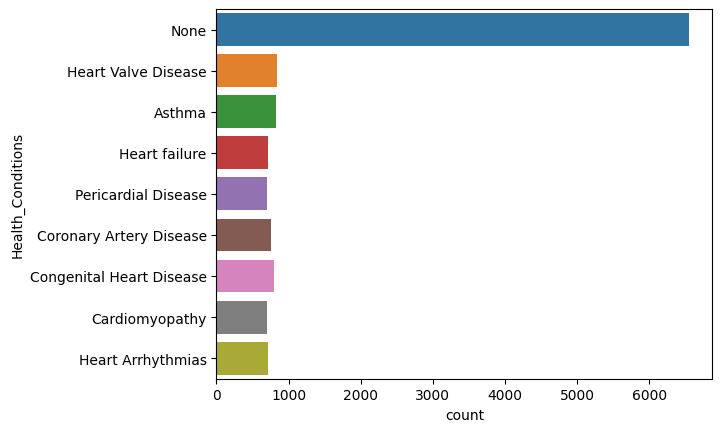

In [ ]:
# Number and count of Health Conditions
import seaborn as sns
sns.countplot(y = 'Health_Conditions', data=final_df)

### Model Development

In [ ]:
# dataframe
final_df

,Age,Health_Conditions,Health_Status,Activities,geometry,PM2.5,Comment,Recommendation
0,75,None,Healthy,Running,POINT (96.76785 31.51709),91.53,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
0,75,None,Healthy,Running,POINT (96.76785 31.51709),24.00,Moderate,Good day to be active outside
0,75,None,Healthy,Running,POINT (96.76785 31.51709),378.08,Hazardous,Avoid all physical outdoor activities
0,75,None,Healthy,Running,POINT (96.76785 31.51709),183.04,Very Unhealthy,Avoid all physical outdoor activities or resch...
0,75,None,Healthy,Running,POINT (96.76785 31.51709),55.61,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
...,...,...,...,...,...,...,...,...
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),39.44,Unhealthy For Sensitive Groups,Reduce prolonged or heavy outdoor exertion
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),29.22,Moderate,Good day to be active outside
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),86.07,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...
2499,66,None,Healthy,Walking,POINT (72.71767 22.29481),114.60,Unhealthy,Avoid prolonged/heavy outdoor exertion or resc...


In [ ]:
# Encode input data
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to categorical columns
categorical_columns = ['Health_Conditions', 'Health_Status', 'Activities', 'Comment']
final_df[categorical_columns] = ordinal_encoder.fit_transform(final_df[categorical_columns])

final_df

,Age,Health_Conditions,Health_Status,Activities,geometry,PM2.5,Comment,Recommendation
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),91.53,3.0,Avoid prolonged/heavy outdoor exertion or resc...
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),24.00,2.0,Good day to be active outside
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),378.08,1.0,Avoid all physical outdoor activities
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),183.04,5.0,Avoid all physical outdoor activities or resch...
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),55.61,3.0,Avoid prolonged/heavy outdoor exertion or resc...
...,...,...,...,...,...,...,...,...
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),39.44,4.0,Reduce prolonged or heavy outdoor exertion
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),29.22,2.0,Good day to be active outside
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),86.07,3.0,Avoid prolonged/heavy outdoor exertion or resc...
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),114.60,3.0,Avoid prolonged/heavy outdoor exertion or resc...


In [ ]:
final_df['Recommendation'].dtype

dtype('O')

In [ ]:
# Encode target data
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the "Recommendation" column
final_df['Recommendation'] = label_encoder.fit_transform(final_df['Recommendation'])
final_df

,Age,Health_Conditions,Health_Status,Activities,geometry,PM2.5,Comment,Recommendation
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),91.53,3.0,2
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),24.00,2.0,3
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),378.08,1.0,0
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),183.04,5.0,1
0,75,7.0,0.0,1.0,POINT (96.76785 31.51709),55.61,3.0,2
...,...,...,...,...,...,...,...,...
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),39.44,4.0,4
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),29.22,2.0,3
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),86.07,3.0,2
2499,66,7.0,0.0,3.0,POINT (72.71767 22.29481),114.60,3.0,2


In [ ]:
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Avoid all physical outdoor activities': 0,
 'Avoid all physical outdoor activities or reschedule for when air quality is better': 1,
 'Avoid prolonged/heavy outdoor exertion or reschedule for when air quality is better': 2,
 'Good day to be active outside': 3,
 'Reduce prolonged or heavy outdoor exertion': 4,
 'Reduce prolonged/heavy outdoor exertion and Take more breaks during outdoor activities': 5,
 'Remain indoors and keep activity levels low': 6,
 'keep quick relief medicine handy': 7}

In [ ]:
from shapely.geometry import Point

# Extract latitude and longitude from the "geometry" column
final_df['Latitude'] = final_df['geometry'].apply(lambda point: point.y)
final_df['Longitude'] = final_df['geometry'].apply(lambda point: point.x)

# Drop the original "geometry" column
final_df.drop(['geometry'], axis=1, inplace=True)

final_df

,Age,Health_Conditions,Health_Status,Activities,PM2.5,Comment,Recommendation,Latitude,Longitude
0,75,7.0,0.0,1.0,91.53,3.0,2,31.517086,96.767846
0,75,7.0,0.0,1.0,24.00,2.0,3,31.517086,96.767846
0,75,7.0,0.0,1.0,378.08,1.0,0,31.517086,96.767846
0,75,7.0,0.0,1.0,183.04,5.0,1,31.517086,96.767846
0,75,7.0,0.0,1.0,55.61,3.0,2,31.517086,96.767846
...,...,...,...,...,...,...,...,...,...
2499,66,7.0,0.0,3.0,39.44,4.0,4,22.294815,72.717670
2499,66,7.0,0.0,3.0,29.22,2.0,3,22.294815,72.717670
2499,66,7.0,0.0,3.0,86.07,3.0,2,22.294815,72.717670
2499,66,7.0,0.0,3.0,114.60,3.0,2,22.294815,72.717670


In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Create feature matrix and target vector
X = final_df.drop('Recommendation', axis = 1)
y = final_df['Recommendation']

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# View the shape of the test data
X_test.shape

(3785, 8)

In [ ]:
# View the shape of the train data
X_train.shape

(8831, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate the model
LogReg = LogisticRegression(random_state=0)

# Fit Logistic Regression model
LogReg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
# Predict test set results
y_pred = LogReg.predict(X_test)

Accuracy : 0.7408190224570673


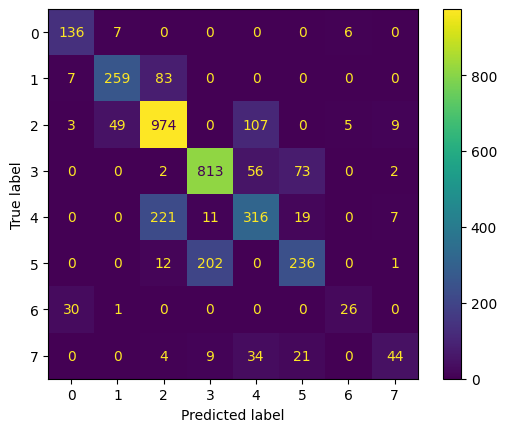

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Displaying Accuracy Score
acc = accuracy_score(y_test,y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
print('Accuracy :',acc)

In [ ]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       149
           1       0.82      0.74      0.78       349
           2       0.75      0.85      0.80      1147
           3       0.79      0.86      0.82       946
           4       0.62      0.55      0.58       574
           5       0.68      0.52      0.59       451
           6       0.70      0.46      0.55        57
           7       0.70      0.39      0.50       112

    accuracy                           0.74      3785
   macro avg       0.73      0.66      0.68      3785
weighted avg       0.74      0.74      0.73      3785



###### Hyper parameter Tunning

In [ ]:
# import libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model_hyp = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_hyp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.947000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.939000 (0.021502) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.939333 (0.020966) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.938667 (0.020934) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.939000 (0.022264) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.939667 (0.021677) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.939000 (0.020873) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.939333 (0.022647) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941000 (0.021190) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.941333 (0.021250) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.941667 (0.021461) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.940667 (0.021124) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.942000 (0.020396) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.946000 (0.019425) wi

In [ ]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       149
           1       0.82      0.74      0.78       349
           2       0.75      0.85      0.80      1147
           3       0.79      0.86      0.82       946
           4       0.62      0.55      0.58       574
           5       0.68      0.52      0.59       451
           6       0.70      0.46      0.55        57
           7       0.70      0.39      0.50       112

    accuracy                           0.74      3785
   macro avg       0.73      0.66      0.68      3785
weighted avg       0.74      0.74      0.73      3785



####### Saving the model

In [57]:

import pickle
# save the model to disk
filename = 'LG_tunned_model.sav'
pickle.dump(model_hyp, open(filename, 'wb'))

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
classifier_tree = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree model
classifier_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict test set results
y_pred_1 = classifier_tree.predict(X_test)

Accuracy : 1.0


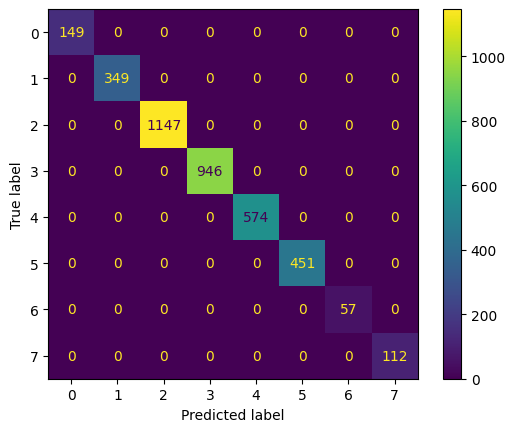

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred_1)
# Displaying Accuracy Score
acc3 = accuracy_score(y_test,y_pred_1)

ConfusionMatrixDisplay(confusion_matrix=cm3).plot();
print('Accuracy :',acc3)

In [ ]:
# Displaying the classification report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       349
           2       1.00      1.00      1.00      1147
           3       1.00      1.00      1.00       946
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       451
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00       112

    accuracy                           1.00      3785
   macro avg       1.00      1.00      1.00      3785
weighted avg       1.00      1.00      1.00      3785



##### Saving the model

In [ ]:
# classifier_tree.save("Recommendation_decission_tree", overwrite=True, include_optimizer=False, save_format='tf')
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier_tree, open(filename, 'wb'))

# some time later...

# load the classifier_tree from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_pred_1)
print(result)

1.0


### Summary and Conclusion

From the above algorithm, Decision Tree was the best performing model with an accuracy of 1.0


\begin{array}{|c|c|} \hline
\textbf{Algorithm}\ & \textbf{Hyper Parameter Tunning} & \textbf{Accuracy before} & \textbf{Accuracy after} \\ \hline
Logistic\;Regression & Yes & 0.7408 & 0.9783  \\ \hline  
Decision\;Tree\;Classifier & No & 1.0 & N/A \\ \hline
\end{array}